In [1]:
# Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder


#test comment
#comment

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))
stop=set(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\damie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
path_z= 'Sarcasm_Headlines_Dataset_v2.json'
df = pd.read_json(path_z, lines=True)
df=df.dropna()
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


<AxesSubplot:>

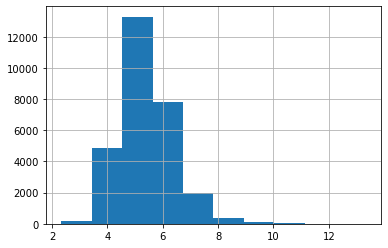

In [53]:
df['headline'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [4]:
corpus=[]
new= df['headline'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [5]:
from nltk.util import ngrams

In [6]:
from collections import Counter

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(dataframe,corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

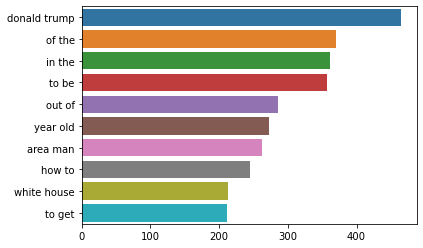

In [8]:
top_n_bigrams=get_top_ngram(df,df["headline"],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

In [9]:
df['headline_no_stopwords'] = df['headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [10]:
df

,is_sarcastic,headline,article_link,headline_no_stopwords
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,dem rep. totally nails congress falling short ...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,eat veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,inclement weather prevents liar getting work
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,mother comes pretty close using word 'streamin...
...,...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...,jews celebrate rosh hashasha something
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...,beautiful acceptance speech week came queer ko...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...,mars probe destroyed orbiting spielberg-gates ...


In [11]:
top_n_bigrams=get_top_ngram(df,df["headline_no_stopwords"],2)[:10]
x,y=map(list,zip(*top_n_bigrams))

In [12]:
len(df)

28619

In [13]:
x_sarcastic=[0,0,0,0,0,0,0,0,0,0]
for i in range(10):
    for j in range(len(df)):
        if top_n_bigrams[i][0] in df["headline"][j]:
            if df["is_sarcastic"][j]==1:
                x_sarcastic[i]+=1

In [14]:
data=[]
for i in range(10):
    a=list(top_n_bigrams[i])
    a.append(x_sarcastic[i])
    a.append((top_n_bigrams[i][1]-x_sarcastic[i]))
    data.append(a)

data2=[]
for i in range(10):
    data2.append([data[i][0],data[i][2],"Yes"])
    data2.append([data[i][0],data[i][3],"No"])


    

In [15]:
df1=pd.DataFrame(data)

In [16]:
df1=df1.set_axis(['keywords', 'iteration', 'sarcastic', 'non_sarcastic'], axis=1, inplace=False)

In [17]:
df2=pd.DataFrame(data2)

In [18]:
df2=df2.set_axis(['keywords', 'iteration', 'sarcastic'], axis=1, inplace=False)

In [19]:
df2

,keywords,iteration,sarcastic
0,donald trump,17,Yes
1,donald trump,447,No
2,year old,1,Yes
3,year old,272,No
4,area man,263,Yes
5,area man,0,No
6,white house,127,Yes
7,white house,86,No
8,hillary clinton,38,Yes
9,hillary clinton,141,No


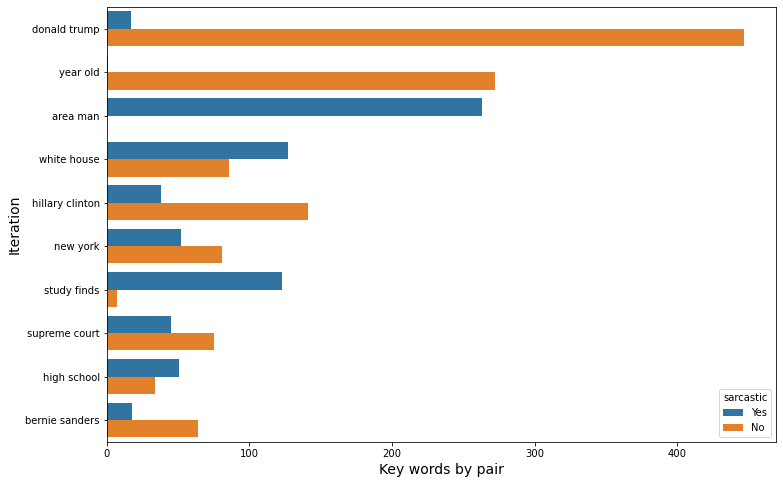

In [20]:
plt.figure(figsize=(12, 8))
plt.tight_layout()
ax=sns.barplot(y="keywords",
            x="iteration", 
            hue="sarcastic", 
            data=df2)

plt.ylabel("Iteration", size=14)
plt.xlabel("Key words by pair", size=14)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.figure.savefig("output.png")

In [21]:
df3=df1.drop(columns="iteration")

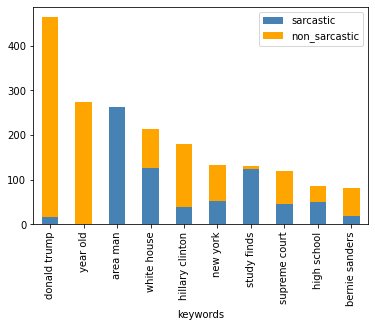

In [22]:
ax=df3.set_index('keywords').plot(kind='bar', stacked=True, color=['steelblue', 'orange'])

In [23]:
df3

,keywords,sarcastic,non_sarcastic
0,donald trump,17,447
1,year old,1,272
2,area man,263,0
3,white house,127,86
4,hillary clinton,38,141
5,new york,52,81
6,study finds,123,7
7,supreme court,45,75
8,high school,51,34
9,bernie sanders,18,64


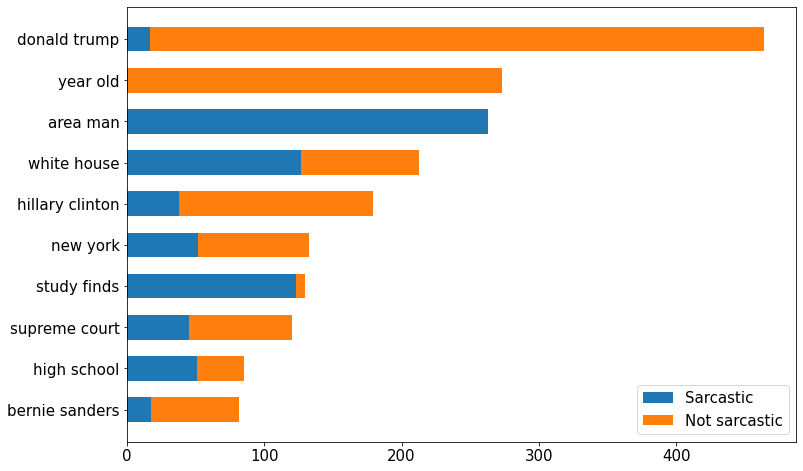

In [24]:
labels = list(df3["keywords"])
sarcastic = list(df3["sarcastic"])
no_sarcastic = list(df3["non_sarcastic"])
width = 0.6       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(labels, sarcastic, width, label='Sarcastic')
ax.barh(labels, no_sarcastic, width, left=sarcastic,
       label='Not sarcastic')
ax.invert_yaxis()

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
ax.legend(prop={'size':15})





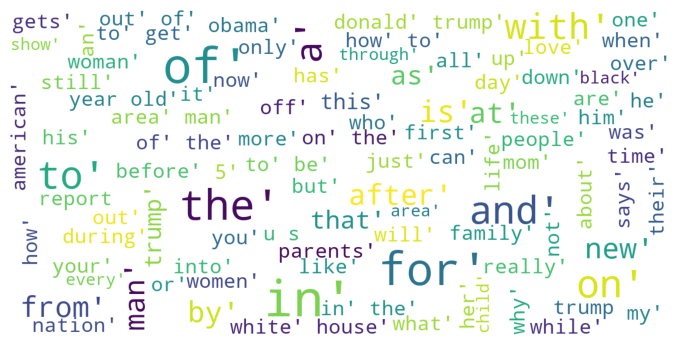

In [32]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

In [38]:
pat = r'\b(?:{})\b'.format('|'.join(stopwords))
df['Split Text'] = df["headline_no_stopwords"].str.replace(pat, '')

<ipython-input-38-866ffd6cd4a2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Split Text'] = df["headline_no_stopwords"].str.replace(pat, '')


(-0.5, 999.5, 499.5, -0.5)

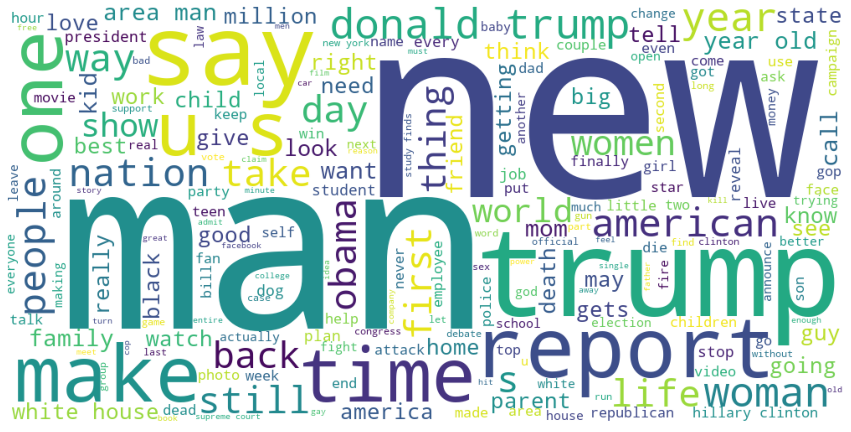

In [47]:
wordcloud1=WordCloud(width=1000,height=500,background_color='white').generate(' '.join(map(str, df['Split Text'])))

plt.figure(figsize=(15,8))
plt.imshow(wordcloud1)
plt.axis('off')

In [64]:
nr_words=df['headline'].str.split().map(lambda x: len(x))

In [85]:
nr_words = nr_words[nr_words<40]

In [92]:
nr_words.name="Number of words per headline"

<AxesSubplot:xlabel='Number of words per headline', ylabel='Count'>

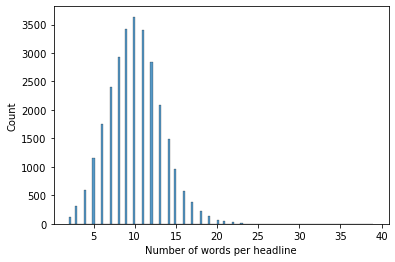

In [93]:
sns.histplot(data=nr_words)

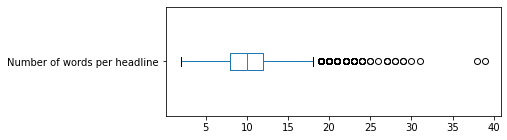

In [109]:
fig = plt.figure(figsize=(6, 2))
ax = nr_words.plot.box(vert=False)

In [95]:
nr_words.mean()

10.04504158222098

In [97]:
nr_words.quantile(.25)

8.0

In [98]:
nr_words.quantile(.75)

12.0

In [99]:
nr_words.quantile(.10)

6.0

In [100]:
nr_words.quantile(.90)

14.0

In [101]:
nr_words.min()

2

In [102]:
nr_words.max()

39

In [115]:
len(df["headline"][1])

79

In [116]:
nr_words.quantile(.50)

10.0